# Mathematical Finance
In this section, we will go through some of the aspects of mathematical modeling in the field of finance

## Time value of money
### How much should you me pay now if give you £100 in 1 year's time? 
Said other way, what is £100 in one year's time worth today?

This is called Present Value. In order to answer, this question, we need to know the running interest rate. For now, we can use a constant 5.25% interest rate. Which means, if you invest £100 today, you'll get $(1+0.0525)*£ 100 = £105.25$in 1 years time. Thus, £105.25 in 1 years time are worth £100 today. Using this, can we find the worth of £100 in 1 year time today? 

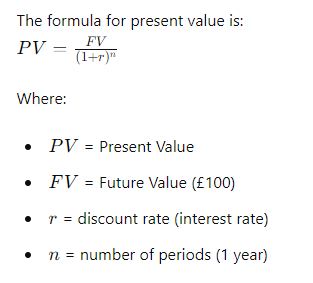

In [8]:
def find_pv( future_value, rate_of_interest, time_in_years ):
    return future_value/(1+rate_of_interest)**time_in_years

assert(find_pv( 105, 0.05, 1 ) == 100) # 1 year bond paying 105 at 5% interest rate should be worth 100
assert(find_pv( 100, 0.0, 1 ) == 100)

# Answering our original question
future_value, rate_of_interest, time_in_years = 100, 0.0525, 1
present_value = find_pv( future_value, rate_of_interest, time_in_years )
print( "Present value of {} at {} rate of interest in {} years time is {}".format( 
    future_value, rate_of_interest, time_in_years, round( present_value, 4 ) ) )

Present value of 100 at 0.0525 rate of interest in 1 years time is 95.0119


## Bond pricing
### What is a bond?
According to [Wikipedia](https://en.wikipedia.org/wiki/Bond_(finance)), a bond is a type of security under which the issuer (debtor) owes the holder (creditor) a debt, and is obliged – depending on the terms – to provide cash flow to the creditor (e.g. repay the principal (i.e. amount borrowed) of the bond at the maturity date as well as interest (called the coupon) over a specified amount of time)

### What do we need to price a risk-free bond?
Rate of interest ($r$), time to maturity/expiry ($t$), Principal/Notional ($N$), coupon rate ($c$)

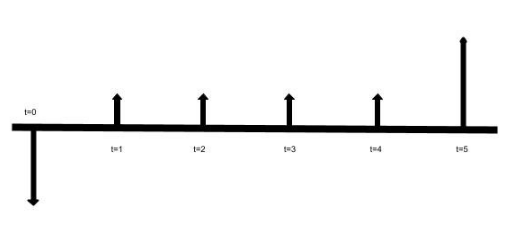

### Given this infoirmation, what is the fair price one should pay for this bond?


The value of the future cashflows as of today i.e. Time value of Money

$$P = \frac{c_1}{1+r_1} + \frac{c_2}{(1+r_2)^2} + \frac{c_3}{(1+r_3)^3} + ... + \frac{N+c_t}{(1+r_t)^t}$$

For simplicity, let's assume constant coupon rate ($c$) and rate of interest ($r$)

$$P = \frac{c}{1+r} + \frac{c}{(1+r)^2} + \frac{c}{(1+r)^3} + ... + \frac{N+c}{(1+r)^t}$$

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def create_cashflows(coupon, notional, time):
    cashflows      = [coupon]*time
    cashflows[-1] += notional
    return cashflows

def bond_pricer(coupon, notional, time, riskfree_rate):
    future_cashflows = create_cashflows(coupon, notional, time)
    bond_price       = 0.0
    for cashflow, tp in zip(future_cashflows, range(time)):
        bond_price += cashflow/(np.power((1 + riskfree_rate),tp + 1))
    return round(bond_price, 4)

In [11]:
c = 1    # coupon rate, absolute £ value
N = 100  # notional of the bond, £ value
t = 5    # time to maturity (in years)
r = 0.05 # risk-free rate of return (absolute), equivalent of 10%
print("Price of the bond is £", bond_pricer(c, N, t, r))

## sanity check
assert(bond_pricer(0, N, t, 0) == 100.0) # zero coupon- zero rate of interest
assert(bond_pricer(10, N, t, 0.1) == 100.0) # coupon rate == rate of interest

Price of the bond is £ 82.6821


### Challenge #1 (Trick question): Changing rate of interests
What if we have different rate of interests for different periods? Say $r_1, r_2, r_3, r_4, r_5$ for each of the time periods? Catch, think what these rates represent? What exactly is $r_2$ and $r_5$?

Can you write a function for it?
Check your solution with these conditions:

```
assert(abs(find_pv_for_varying_ir_spot(0, 100, 5, [0.01, 0.02, 0.03, 0.04, 0.05]) - 78.3526 ) < 1e-4)
assert(abs(find_pv_for_varying_ir_spot(5, 100, 5, [0.01, 0.02, 0.03, 0.04, 0.05]) - 100.8763) < 1e-4)
```

### Pricing a risk bond
Now, most of bonds in the market are so-called risky or corporate bonds. There is a default risk associated with these bonds.
Let's assume at every discrete time interval, bonds can default with probability $d$. Incorporating this risk in the pricing, we have:
$$P = \Biggl( \frac{1-d}{1+r} \Biggr)c + \Biggl( \frac{1-d}{1+r} \Biggr)^2 c + \Biggl( \frac{1-d}{1+r} \Biggr)^3c + ... +  \Biggl( \frac{1-d}{1+r} \Biggr)^t(N+c)$$

In [12]:
def risky_bond_pricer(coupon, notional, time, riskfree_rate, default_probability = 0.0):
    future_cashflows = create_cashflows(coupon, notional, time)
    bond_price       = 0.0
    for cashflow, tp in zip(future_cashflows, range(time)):
        bond_price += cashflow*(np.power((1-default_probability), tp+1 ))/(np.power((1+riskfree_rate), tp+1 ))
    return round(bond_price, 4)

In [15]:
c = 5    # coupon rate, absolute £ value
N = 100  # notional of the bond, £ value
t = 5    # time to maturity (in years)
r = 0.05 # risk-free rate of return (absolute), equivalent of 10%
d = 0.1  # 10% default probability
print("Price of the risk-free bond is £", bond_pricer(c, N, t, r))
print("Price of the risky bond is £", risky_bond_pricer(c, N, t, r, d))

## sanity check
assert(risky_bond_pricer(0, N, t, 0) == 100.0) # zero coupon- zero rate of interest
assert(risky_bond_pricer(10, N, t, 0.1) == 100.0) # coupon rate == rate of interest

Price of the risk-free bond is £ 100.0
Price of the risky bond is £ 62.3865


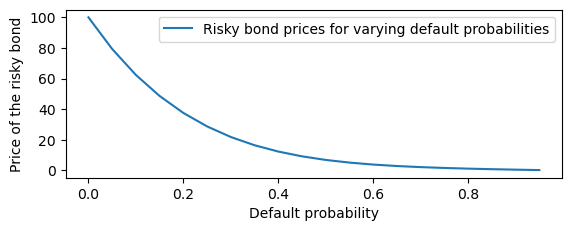

In [18]:
default_probs     = np.linspace(0, 0.95, 20)
risky_bond_prices = []
for def_prob in default_probs:
    risky_bond_prices.append(risky_bond_pricer(c, N, t, r, def_prob))

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(default_probs, risky_bond_prices, label='Risky bond prices for varying default probabilities')
plt.xlabel('Default probability')
plt.ylabel('Price of the risky bond')
plt.legend()

#### What if we allow the default probabilities to vary?

Instead of constant default probabilities, we can have time-varying default probabilities. Mathematically, this reduces to
$$P = \Biggl( \frac{1-d_1}{1+r} \Biggr)c + \Biggl( \frac{1-d_1}{1+r} \Biggr) \Biggl( \frac{1-d_2}{1+r} \Biggr)c + ... +  \Biggl[\Biggl( \frac{1-d_1}{1+r} \Biggr).... \Biggl( \frac{1-d_{t}}{1+r} \Biggr)\Biggr](N+c)$$

So, if we have default probabilities, easy to work out risky bond price.

In [19]:
def risky_bond_pricer_time_varying_default_probs( coupon, notional, time, riskfree_rate, default_probabilities ):
    default_probabilities    = default_probabilities or [0.0]*time
    future_cashflows         = create_cashflows( coupon, notional, time )
    bond_price               = 0.0
    conditional_default_prob = 1
    for cashflow, tp in zip( future_cashflows, range( time ) ):
        conditional_default_prob = conditional_default_prob * ( 1 - default_probabilities[ tp ] )
        bond_price              += ( cashflow * conditional_default_prob / ( np.power( ( 1 + riskfree_rate ), tp + 1 ) ) )
    return round( bond_price, 4 )

In [20]:
c = 10                          # coupon rate, absolute £ value
N = 100                         # notional of the bond, £ value
t = 5                           # time to maturity (in years)
r = 0.05                        # risk-free rate of return (absolute), equivalent of 10%
d = [0.1, 0.1, 0.15, 0.2, 0.3]  # default probabilities
print("Price of the risky bond is £", risky_bond_pricer_time_varying_default_probs(c, N, t, r, d))

## sanity check
# Case-1 zero coupon- zero rate of interest- no default probability
assert(risky_bond_pricer_time_varying_default_probs(0, N, t, 0, None) == 100.0) 
# Case-2 coupon rate == rate of interest - no default probability
assert(risky_bond_pricer_time_varying_default_probs(10, N, t, 0.1, None) == 100.0) 
# Case-3 coupon rate == rate of interest - no default probability - both pricers should match
assert(risky_bond_pricer_time_varying_default_probs(10, N, t, 0.1, None) == risky_bond_pricer(10, N, t, 0.1))

Price of the risky bond is £ 59.6279


### default curve modeling
Usually, the problem we have at hand is we observe the bond prices in the market and we workout the (market expectation) of default probabilities.
Given the prices of bond written by the same entity but maturiting in 1 year, 2 year, ... t years could give us the picture what is the market expectation of entity's default.

In mathematical terms, we are given $P_1, P_2, ... , P_t $ and we are trying to work-out the dynamics of the default probabilities $d_1, d_2, ... , d_t$

$$
\begin{align*}
P_1 &= \Biggl( \frac{1-d_1}{1+r} \Biggr)(c + N) \\
\\
P_2 &= \Biggl( \frac{1-d_1}{1+r} \Biggr)c + \Biggl( \frac{1-d_1}{1+r} \Biggr) \Biggl( \frac{1-d_2}{1+r} \Biggr)(c + N) \\
\\
...\\
\\
P_t &= \Biggl( \frac{1-d_1}{1+r} \Biggr)c + \Biggl( \frac{1-d_1}{1+r} \Biggr) \Biggl( \frac{1-d_2}{1+r} \Biggr)c + ... +  \Biggl( \frac{1-d_1}{1+r} \Biggr)....\Biggl( \frac{1-d_{t}}{1+r} \Biggr)(c + N) \\
\end{align*}
$$

For the sake of simplicity, we can assume zero-coupon bonds:
$$
\begin{align*}
P_1 &= \Biggl( \frac{1-d_1}{1+r} \Biggr)N \\
\\
P_2 &= \Biggl( \frac{1-d_1}{1+r} \Biggr) \Biggl( \frac{1-d_2}{1+r} \Biggr)N \\
\\
...\\
\\
P_t &= \Biggl( \frac{1-d_1}{1+r} \Biggr)....\Biggl( \frac{1-d_{t}}{1+r} \Biggr)N \\
\end{align*}
$$

Working backwards, we can solve for $d_i$


In [27]:
def default_probabilities(coupon, notional, time, riskfree_rate, bond_prices):
    default_probabilities = []
    for tp in range(1, time + 1):
        if tp == 1:
            survival_probability = bond_prices[tp - 1] / (notional * (1 + riskfree_rate)**tp)
        else:
            survival_probability = bond_prices[tp - 1] / (bond_prices[tp - 2] * (1 + riskfree_rate))
        default_probability = 1 - survival_probability
        default_probabilities.append(default_probability)
    return default_probabilities

In [28]:
c             = 10                     # coupon rate, absolute £ value
N             = 100                    # notional of the bond, £ value
t             = 5                      # time to maturity (in years)
r             = 0.05                   # risk-free rate of return (absolute), equivalent of 10%
bond_prices   = [ 82, 78, 73, 68, 63 ] # bond prices of different tenors
default_probs = default_probabilities(c, N, t, r, bond_prices)
print( "Conditional default probabilities are", default_probs )

## sanity check
# Case-1 zero coupon- zero rate of interest- bondtrading on face Value should have 0 default probabilities
assert(default_probabilities(0, N, t, 0, [100, 100, 100, 100, 100]) == [0.0, 0.0, 0.0, 0.0, 0.0]) 
# Case-2 t=2 case
assert(default_probabilities(0, N, 2, 0.0, [100, 100]) == [0.0, 0.0]) 

Conditional default probabilities are [0.21904761904761905, 0.09407665505226492, 0.10866910866910873, 0.11285061969993482, 0.11764705882352944]


### Challenge #2: Changing rate of interests
What if we again have different rate of interests for different periods? Say $r_1, r_2, r_3, r_4, r_5$ for each of the time periods?

Can you write a function for it?
Check your solution with these conditions:

```
assert(abs(sum(default_probabilities_varying_rates(0, 100, 5, [0.0, 0.0, 0.0, 0.0, 0.0], [100, 100, 100, 100, 100])) - 0) < 1e-4)
assert(abs(sum(default_probabilities_varying_rates(0, 100, 5, [0.01, 0.02, 0.03, 0.04, 0.05], [100, 100, 100, 100, 100])) - 0.1447) < 1e-4)
```